# Example usage

Here we will demonstrate how to use `pynyairbnb` to run an analysis on New York City Airbnb Data.

In [1]:
import pynyairbnb
from pynyairbnb.data_preprocessing import create_dir_if_not_exists, read_data, convert_missing_values, split_data, save_dataframes, add_price_category, data_preprocessing
from pynyairbnb.plotting import rank_correlations, sns_plotting, plot_pynyairbnb
from pynyairbnb.pynyairbnb import build_preprocessor, build_clf_model, knn_param_optimization, nyairbnb_analysis
import pandas as pd

ModuleNotFoundError: No module named 'pynyairbnb'

# Reading and Preprocessing Data

We can use the `data_preprocessing` function from the `data_preprocessing` module to load and prepare the data before moving onto later analyses. This function is a union of several other smaller functions in the module like `read_data` and `convert_missing_values`, all of which can also be accessed if and when needed. `data_preprocessing` loads the data from the URL, performs the necessary EDA, splits the data into training and test dataframes and saves them all as CSVs to the provided outpath.

In [11]:
data_preprocessing("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-12-04/visualisations/listings.csv", "sample_data")

In [12]:
train_df = pd.read_csv("sample_data/train_df.csv")
train_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_category
0,38522305,Rental unit in New York · ★4.72 · 1 bedroom · ...,112452087,Hannah,Manhattan,East Harlem,40.79905,-73.93762,Private room,69,30,46,2020-11-20,0.89,2,0,0,NaN,50-100
1,53980983,Condo in New York · ★4.33 · 1 bedroom · 1 bed ...,200239515,Shogo,Manhattan,Inwood,40.86570,-73.92225,Private room,36,30,3,2023-05-06,0.16,246,56,1,NaN,0-50
2,27429817,Home in Queens · ★4.96 · 1 bedroom · 2 beds · ...,161899037,Tony,Queens,Flushing,40.75631,-73.83327,Entire home/apt,149,30,156,2023-10-14,2.76,7,90,38,NaN,100-150


# Creating Visualizations

The `plotting` module has a couple of functions that are quite handy to help generate the plots and tables we need for the analysis. We can use the `plot_pynyairbnb` function to create _all_ the visualizations and tables we would need for the analysis in one go. However, if you want, you can also call one of the contained functions `rank_correlations` or `sns_plotting` where and when necessary.

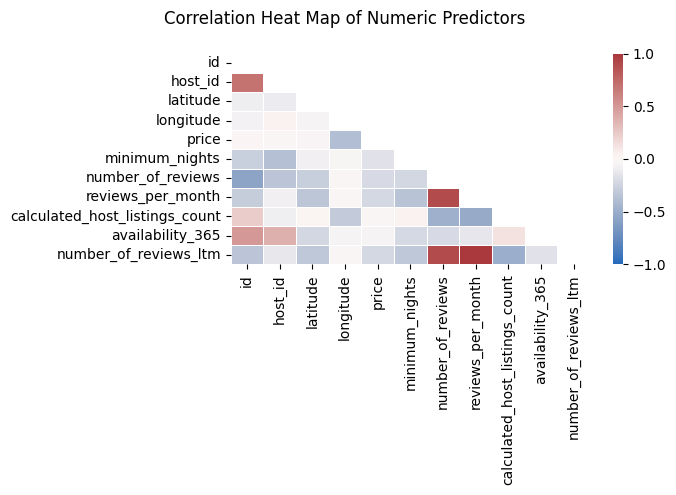

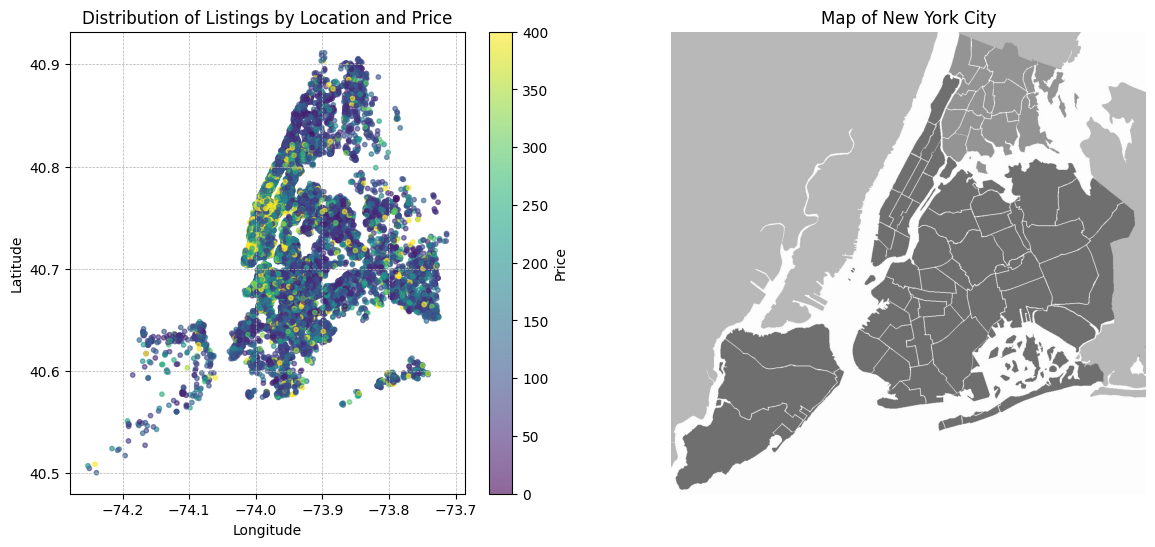

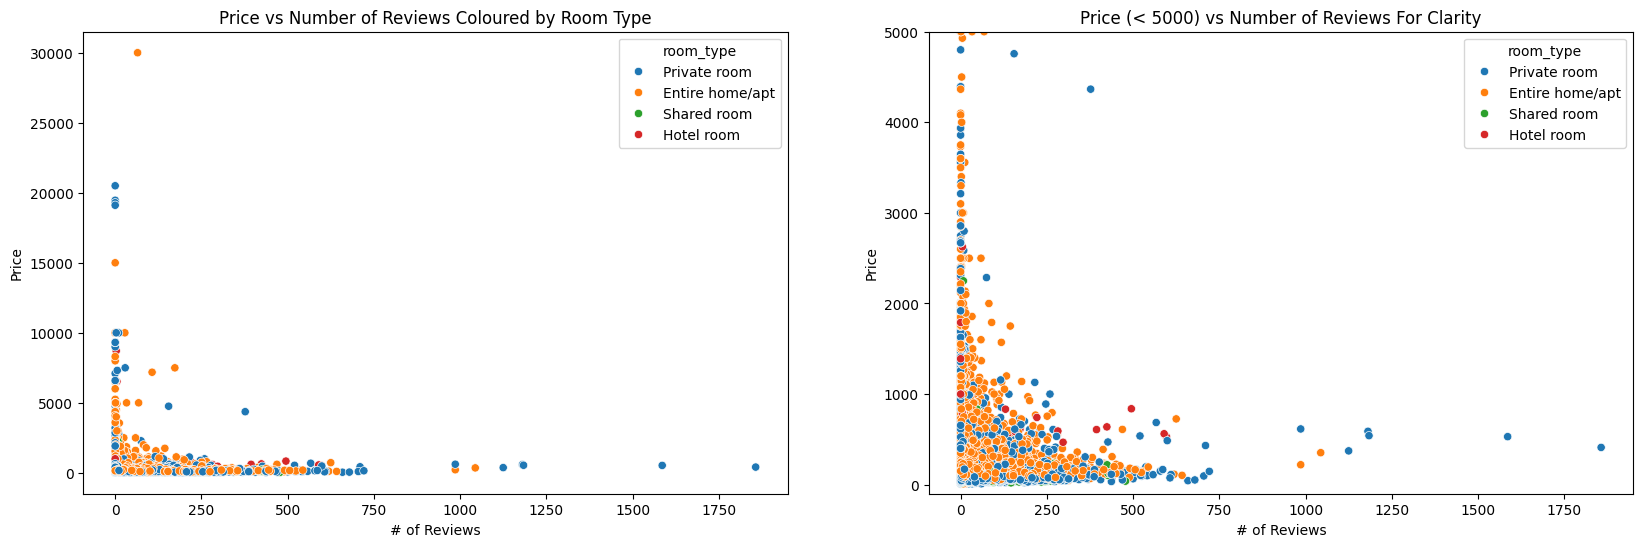

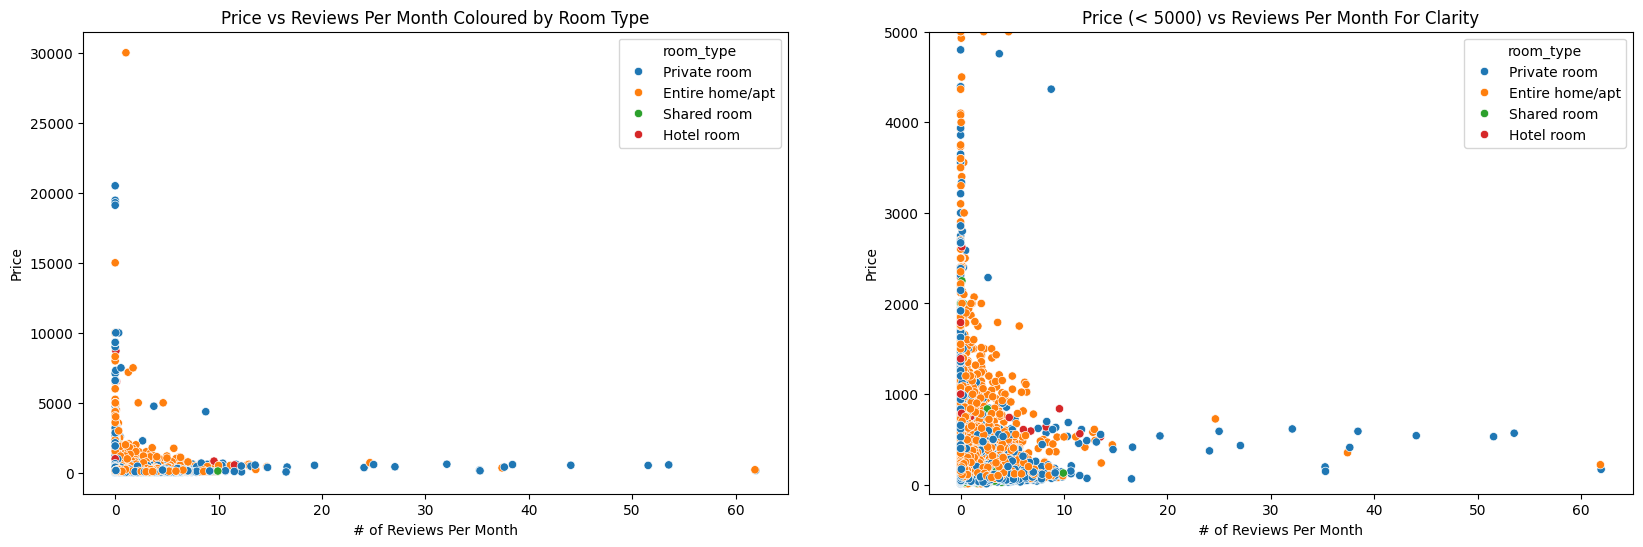

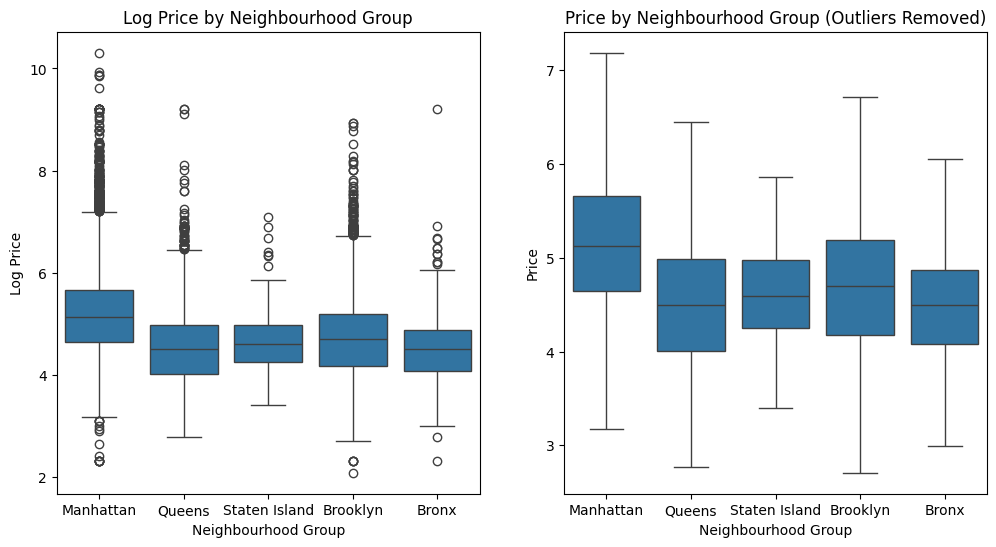

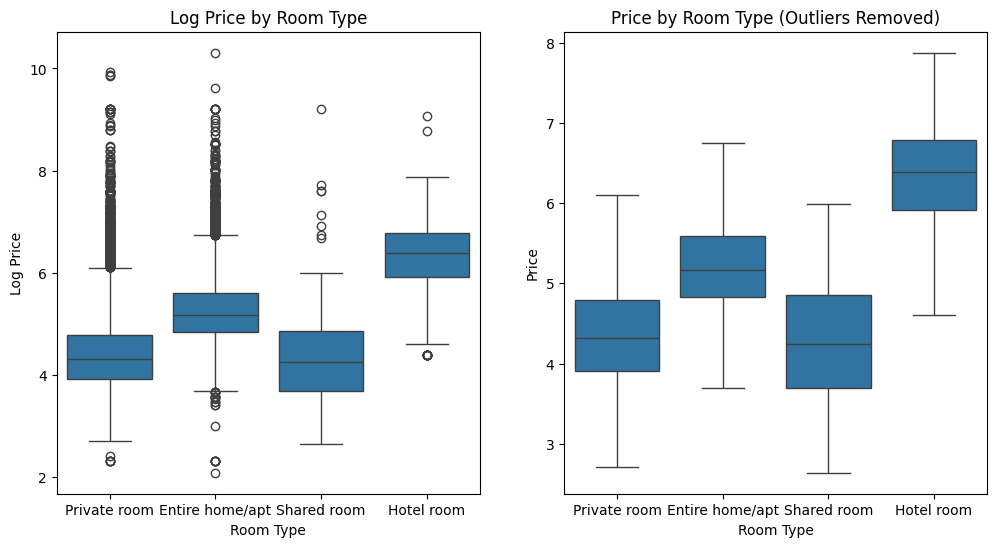

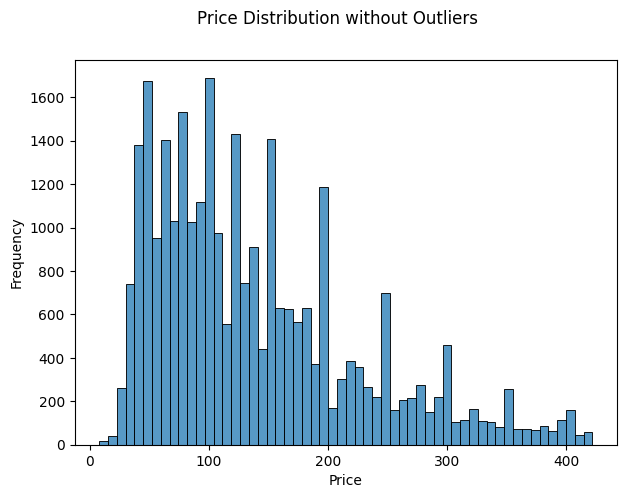

In [13]:
plot_pynyairbnb("sample_data/train_df.csv", "sample_results/figures", "sample_results/tables")

# Building the model and Assessing it

We have the `nyairbnb_analysis` function from the `pynyairbnb` to run our entire analysis from top to bottom (including hyperparameter optimization). This function is a union of the other 3 functions in the module - `build_preprocessor`, `build_clf_model` `knn_param_optimization`, all of which can also be accessed if and when needed. `nyairbnb_analysis` loads the data from the provided input directory, builds the model and performs the optimization, and saves the outputs as tables to the provided output directory.

NOTE: The function `knn_param_optimization` (and as a result, the `nyairbnb_analysis` function) can take about 5 minutes to run.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
nyairbnb_analysis("sample_data", "sample_results/tables")
hyperparam_opt = pd.read_csv("sample_results/tables/hyperparam_classification_report.csv")
hyperparam_opt

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,Unnamed: 0,precision,recall,f1-score,support
0,0-50,0.662500,0.573255,0.614655,1017.000000
1,50-100,0.551349,0.684823,0.610880,2148.000000
2,100-150,0.376905,0.411915,0.393633,1561.000000
3,150-200,0.305344,0.297122,0.301176,1077.000000
4,200-250,0.289474,0.192063,0.230916,630.000000
5,250-300,0.300448,0.176316,0.222222,380.000000
6,300-350,0.389610,0.128205,0.192926,234.000000
7,350+,0.640177,0.659841,0.649860,879.000000
8,accuracy,0.481327,0.481327,0.481327,0.481327
9,macro avg,0.439476,0.390442,0.402034,7926.000000
